In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Path
path=r'/Users/kristenlehtinen/Documents/World Happiness Report/'

In [4]:
# Importing merged Data
merged_data= pd.read_csv(r'/Users/kristenlehtinen/Documents/World Happiness Report/02 Data/Original Data/merged world happiness report.csv')

In [5]:
merged_data.shape

(782, 10)

In [6]:
merged_data.head()

,Year,Country,Happiness Rank,Happiness Score,Economy,Social Support,Life Expectancy,Freedom,Governmental Trust,Generosity
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


### The elbow Technique 

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
# Creating subset excluding the country column using loc
subset_merged_data = merged_data.loc[:, merged_data.columns != 'Country']

# Verify the subset
print(subset_merged_data.head())

   Year  Happiness Rank  Happiness Score  Economy  Social Support  \
0  2015               1            7.587  1.39651         1.34951   
1  2015               2            7.561  1.30232         1.40223   
2  2015               3            7.527  1.32548         1.36058   
3  2015               4            7.522  1.45900         1.33095   
4  2015               5            7.427  1.32629         1.32261   

   Life Expectancy  Freedom  Governmental Trust  Generosity  
0          0.94143  0.66557             0.41978     0.29678  
1          0.94784  0.62877             0.14145     0.43630  
2          0.87464  0.64938             0.48357     0.34139  
3          0.88521  0.66973             0.36503     0.34699  
4          0.90563  0.63297             0.32957     0.45811  


In [12]:
score = [kmeans[i].fit(subset_merged_data).score(subset_merged_data) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

[-1597249.6251908226,
 -400726.72941057244,
 -179172.55727204145,
 -101720.45512063656,
 -65650.01546328462,
 -46276.19602437895,
 -34474.93048787891,
 -26788.12111512754,
 -21614.492452557268]

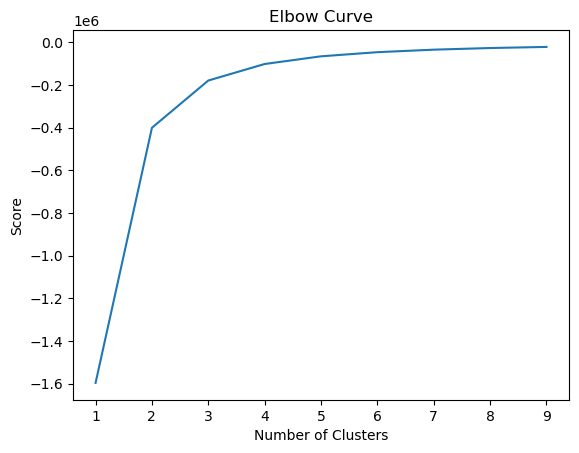

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###  There's a large jump from two to three on the x-axis, but after that, the curve straightens out. The optimal count is 3.

## k-means clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(subset_merged_data)

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [16]:
subset_merged_data['clusters'] = kmeans.fit_predict(subset_merged_data)

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
subset_merged_data.head()

,Year,Happiness Rank,Happiness Score,Economy,Social Support,Life Expectancy,Freedom,Governmental Trust,Generosity,clusters
0,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1
1,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1
2,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1
3,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1
4,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1


In [18]:
subset_merged_data['clusters'].value_counts()

clusters
1    265
0    260
2    257
Name: count, dtype: int64

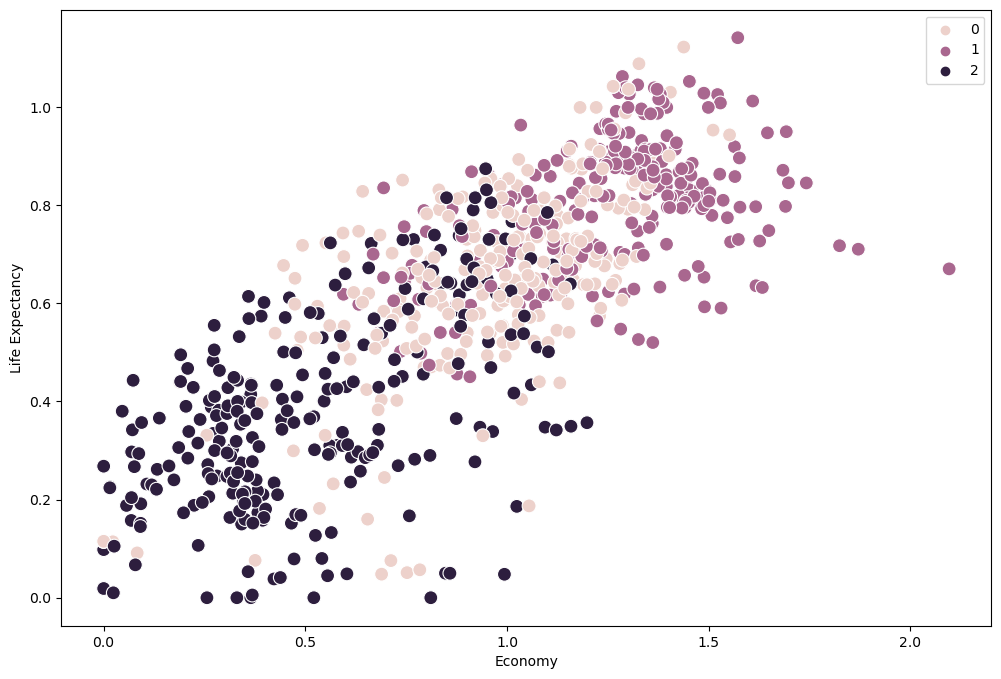

In [21]:
# Plot the clusters for the "Economy" and "Life Expectamcy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset_merged_data['Economy'], y=subset_merged_data['Life Expectancy'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.show()

# Cluster Analysis

Cluster 2 economy levels vary from 0-1.3 while the life expectancy scores vary from 0-0.9. Overall, cluster 2 represents regions with moderate economy levels and relatively lower life expectancy scores compared to clusters 0 and 1.

Cluster 0 economy levels vary from 0-1.5 while the life expectancy scores vary from 0.1-1.1. Cluster 0 represents regions where economy levels are moderate, and life expectancy scores are generally higher compared to cluster 2, indicating better health outcomes.

Cluster 1 economy levles vary from 0.6-2.1 while the life expectancy scores vary from 0.4-1.2. Cluster 1 represents regions with higher economy levels and diverse life expectancy scores, suggesting better health outcomes overall compared to clusters 0 and 2.

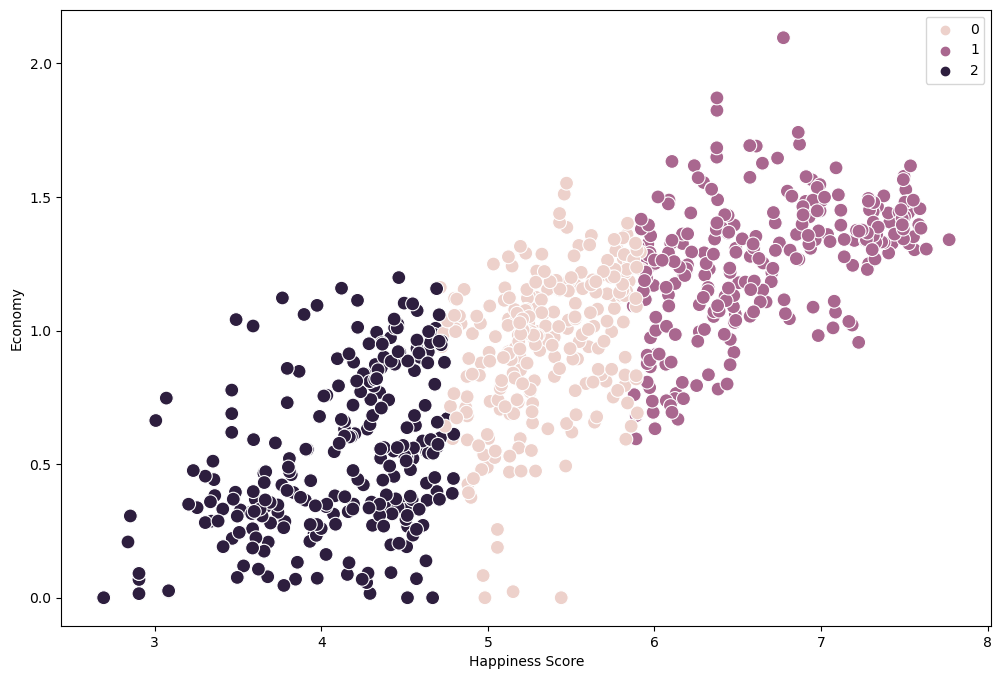

In [22]:
# Plot the clusters for the "Happiness Score" and "Economy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset_merged_data['Happiness Score'], y=subset_merged_data['Economy'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Happiness Score') 
plt.ylabel('Economy') 
plt.show()

# Cluster Analysis

Cluster 2 represents regions with moderate levels of happiness, where the economy scores are generally lower compared to other clusters.

Cluster 0 represents regions where happiness levels are consistently moderate, regardless of slight variations in economic conditions.

Cluster 1 represents regions with diverse relationships between economy and happiness, where both lower and higher economic conditions are associated with varying levels of happiness.

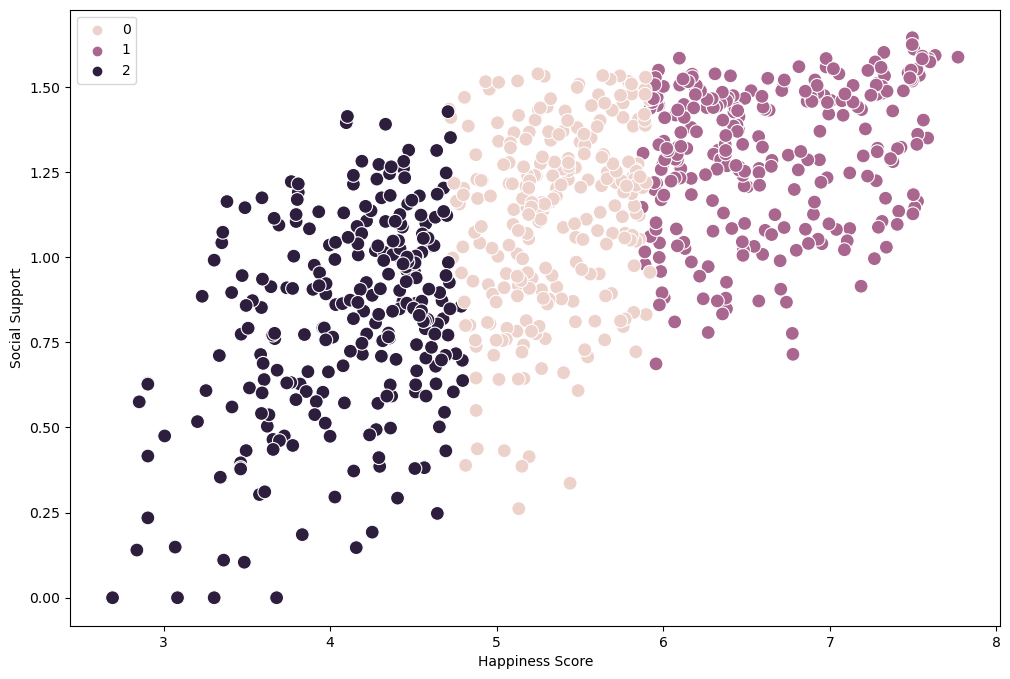

In [27]:
# Plot the clusters for the "Happiness Score" and "Economy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset_merged_data['Happiness Score'], y=subset_merged_data['Social Support'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Happiness Score') 
plt.ylabel('Social Support') 
plt.show()

# Cluster Analysis

Cluster 2 has happiness levels that range from 2.5-4.9 with economy levels ranging from 0-1.35.Overall, cluster 2 represents regions with moderate happiness levels and relatively lower economic development. 

Cluster 0 has happiness levels ranging from 5-6 with economy levels ranging from 0.25-1.50. Cluster 0 represents regions where happiness levels are consistently moderate, regardless of variations in economic conditions, with slightly higher economic development compared to cluster 2.

Cluster1 has happiness levels ranging from 6-8 with economy levels ranging from 0.65-1.60. Cluster 1 represents regions with diverse relationships between economy and happiness, where higher economic conditions are associated with varying levels of happiness, with generally higher happiness levels compared to clusters 0 and 2.

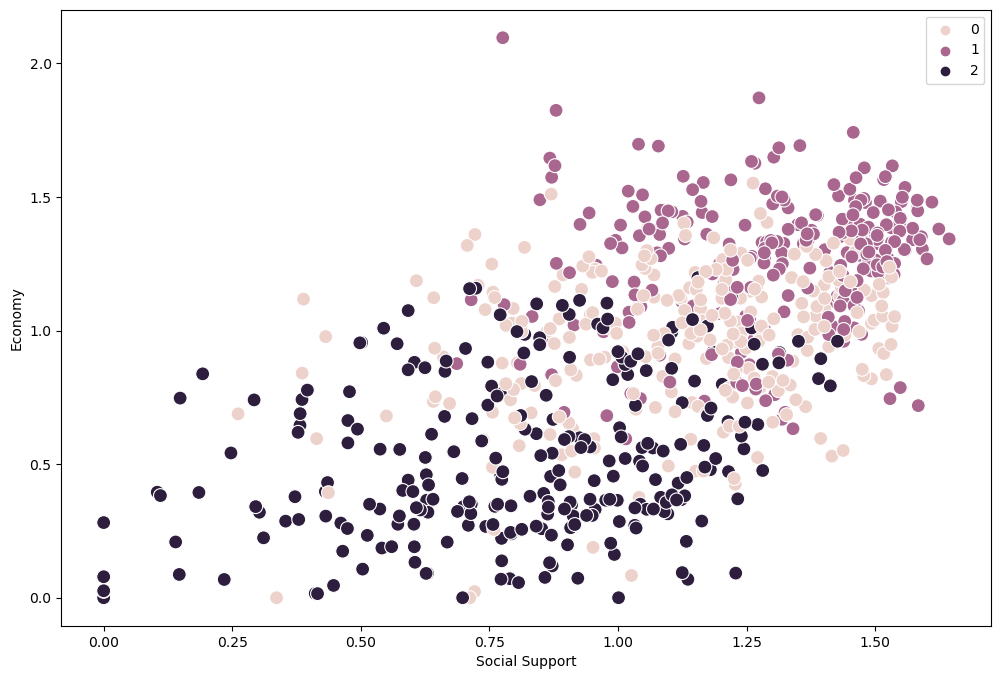

In [30]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset_merged_data['Social Support'], y=subset_merged_data['Economy'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Social Support') 
plt.ylabel('Economy') 
plt.show()

# Cluster Analysis

Cluster 2 has social support scores that vary from 0-1.4 with economy levels varying from 0-1.2. Overall, cluster 2 represents regions with moderate social support scores and relatively lower economy levels compared to clusters 0 and 1.

Cluster 0 has socal support scores that vary from 0.25-1.50 while the economy levels vary from 0-1.5.Cluster 0 represents regions where social support levels are generally moderate to high, and economy levels vary from low to moderate, indicating a positive correlation between social support and economy in these regions.

Cluster 1 has social support scores that vary from 0.6-1.6 while the economy levels vary from 0.6-2.1. Cluster 1 represents regions with higher social support scores and diverse economy levels, suggesting a positive relationship between social support and economy, with higher social support associated with higher economic development.



In [23]:
subset_merged_data.loc[subset_merged_data['clusters'] == 2, 'cluster'] = 'dark purple'
subset_merged_data.loc[subset_merged_data['clusters'] == 1, 'cluster'] = 'purple'
subset_merged_data.loc[subset_merged_data['clusters'] == 0, 'cluster'] = 'pink'

In [29]:
subset_merged_data.groupby('cluster').agg({'Social Support':['mean', 'median','min'], 
                         'Happiness Score':['mean', 'median','min'], 
                         'Economy':['mean', 'median','min'],
                          'Life Expectancy':['mean', 'median','min']})

Social Support                    Happiness Score                 \
                      mean    median      min            mean  median    min   
cluster                                                                        
dark purple       0.813200  0.850000  0.00000        4.107362  4.2180  2.693   
pink              1.115724  1.160419  0.26135        5.352827  5.3025  4.714   
purple            1.298952  1.323000  0.68655        6.637981  6.5050  5.872   

              Economy                    Life Expectancy                      
                 mean    median      min            mean    median       min  
cluster                                                                       
dark purple  0.520847  0.460380  0.00000        0.378281  0.357000  0.000000  
pink         0.953349  0.995769  0.00000        0.650894  0.660785  0.048000  
purple       1.262720  1.305000  0.59448        0.801730  0.814870  0.450192

#### These descriptive statistics can be useful for various future steps in an analytics pipeline such as identifying patterns, modeling, interpretation and decision making, and feature selection.

Descriptive statistics serve as a crucial step in exploring and understanding cluster data, providing valuable insights for subsequent stages of analysis and decision-making in an analytics pipeline.
